<a href="https://colab.research.google.com/github/SatNichapon/DSI205_project/blob/main/DSI205project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get data from kaggleAPI

Install kaggle

In [1]:
!mkdir ~/.kaggle
!echo '{"username":"satnic","key":"2dc47bf14b840441564d87209e1d9136"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download Walmart dataset from Kaggle

In [2]:
!kaggle datasets download yasserh/walmart-dataset

100% 122k/122k [00:00<00:00, 426kB/s]
100% 122k/122k [00:00<00:00, 425kB/s]


In [3]:
!unzip walmart-dataset.zip

Archive:  walmart-dataset.zip
  inflating: Walmart.csv             


#About Dataset

####**Description**:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

####**Acknowledgements**
The dataset is taken from Kaggle.



####**Objective**:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t single & multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

#### **Walmart.csv**
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields: \
* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#Load Walmart-dataset, import Libraries 

In [4]:
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('Walmart.csv')
df = pd.DataFrame(data)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [6]:
df.shape

(6435, 8)

#Clean

In [7]:
df.info() #ดู data type ของแต่ละ attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Nothing weird

In [11]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


No duplicate




In [12]:
df.isnull().mean()

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

No missing value

In [13]:
columns = list(df.columns)
columns

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

<h3> Fixing Outliers </h3>


In [14]:
def find_outlier_rows(df, col):
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

  lower_bound = df[col].quantile(0.25) - 1.5*iqr
  upper_bound = df[col].quantile(0.75) + 1.5*iqr
  
  return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [15]:
def count_outliers(df):
  df_numeric = df.select_dtypes(['int', 'float'])
  cols_numeric = df_numeric.columns

  outlier_cols = [col for col in cols_numeric if len(find_outlier_rows(df_numeric, col)) != 0]

  outliers_df = pd.DataFrame(columns=['outlier_count', 'outlier_percent'])

  for col in outlier_cols:
    outlier_count = len(find_outlier_rows(df_numeric, col))
    all_entries = len(df[col])
    outlier_percent = (outlier_count/all_entries)*100

    outliers_df.loc[col] = [outlier_count, outlier_percent]

  return outliers_df

In [16]:
count_outliers(df).sort_values('outlier_count', ascending=False)

,outlier_count,outlier_percent
Unemployment,481.0,7.474747
Holiday_Flag,450.0,6.993007
Weekly_Sales,34.0,0.528361
Temperature,3.0,0.046620


The above dataframe shows that Unemployment, Holiday_Flag, Weekly_Sales and Temperature all have outliers. 

Let's examine further into each column to decide how to handle them.


In [17]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [18]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

In [19]:
find_outlier_rows(df, 'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003


In [20]:
df['Employment'] = 100 - df['Unemployment']
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
2436,18,2010-12-03,1138800.32,0,42.39,2.805,131.784000,9.202,90.798
3361,24,2011-06-24,1304850.67,0,68.88,3.964,135.265267,8.212,91.788
233,2,2011-10-28,1769296.25,0,65.87,3.372,217.325182,7.441,92.559


In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


#EDA

<h3>Overall trend in sales over time</h3> 

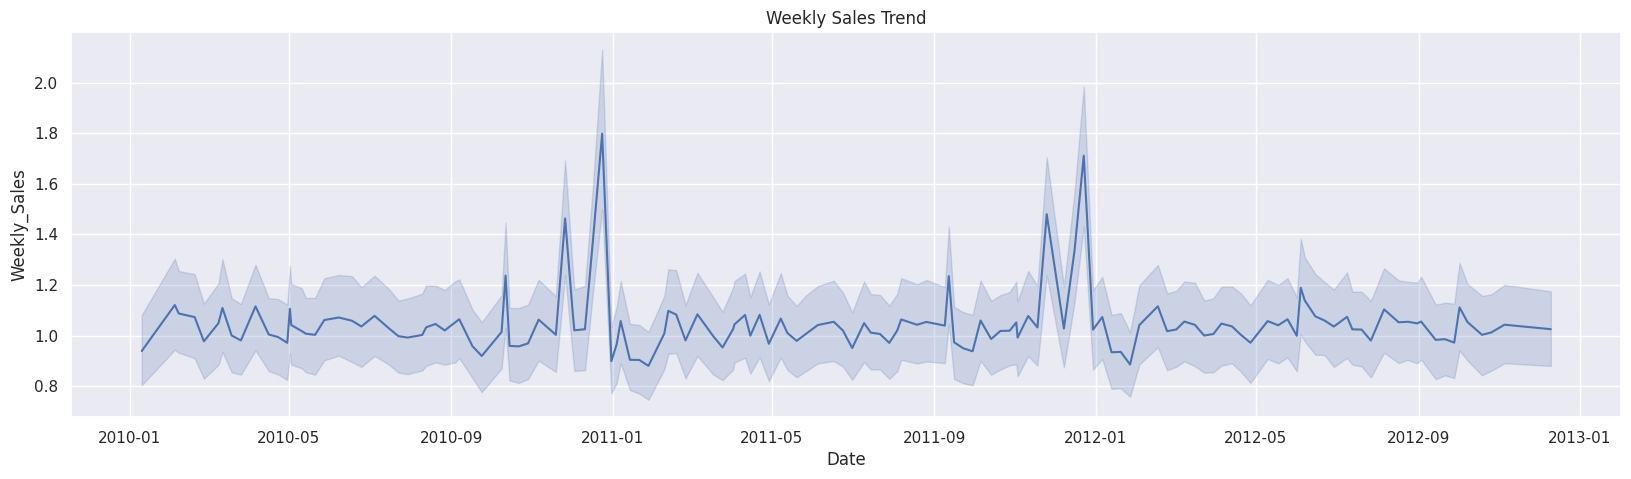

In [22]:
plt.figure(figsize=(20, 5))

sns.lineplot(x=df.Date , y=(df.Weekly_Sales/1e6))

plt.title('Weekly Sales Trend')
plt.show()

In [23]:
weekly_sales = pd.pivot_table(df, values='Weekly_Sales', columns='Year', index='Month')
weekly_sales

Year,2010,2011,2012
Month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


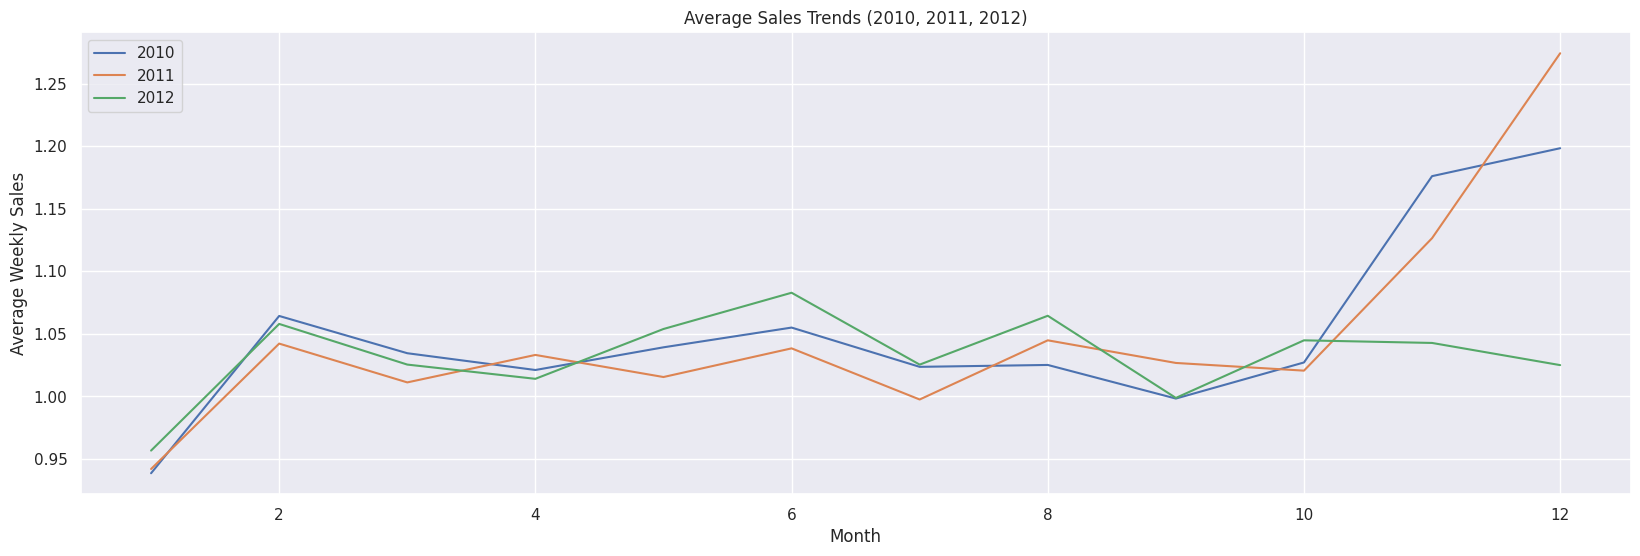

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=weekly_sales.index, y=weekly_sales[2010]/1e6, ax=ax, label='2010')
sns.lineplot(x=weekly_sales.index, y=weekly_sales[2011]/1e6, ax=ax, label='2011')
sns.lineplot(x=weekly_sales.index, y=weekly_sales[2012]/1e6, ax=ax, label='2012')

plt.ylabel('Average Weekly Sales')
plt.title('Average Sales Trends (2010, 2011, 2012)')

plt.legend()
plt.show()

In [25]:
sales_store = df.groupby('Store').sum().reset_index()

In [26]:
top_sales_store = sales_store.sort_values('Weekly_Sales', ascending=False).head()[['Store', 'Weekly_Sales']].sort_values('Weekly_Sales')
top_sales_store

,Store,Weekly_Sales
1,2,2.753824e+08
12,13,2.865177e+08
13,14,2.889999e+08
3,4,2.995440e+08
19,20,3.013978e+08


In [27]:
bottom_sales_store = sales_store.sort_values('Weekly_Sales').head()[['Store', 'Weekly_Sales']].sort_values('Weekly_Sales', ascending=False)
bottom_sales_store

,Store,Weekly_Sales
37,38,55159626.42
35,36,53412214.97
4,5,45475688.90
43,44,43293087.84
32,33,37160221.96


Text(0.5, 1.0, 'Top Sales Store')

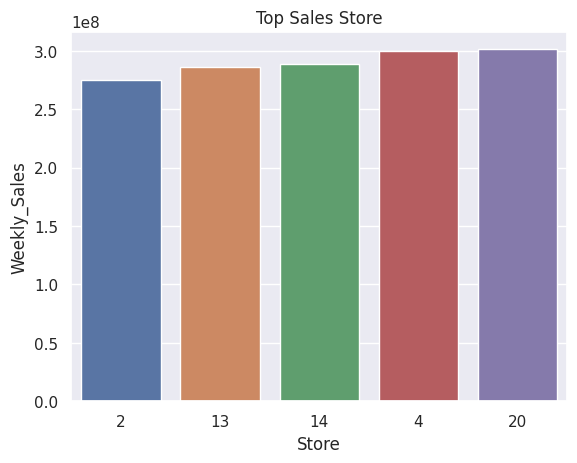

In [28]:
sns.barplot(x='Store', y='Weekly_Sales', data=top_sales_store, order=top_sales_store.Store)
plt.title('Top Sales Store')

Text(0.5, 1.0, 'Bottom Sales Store')

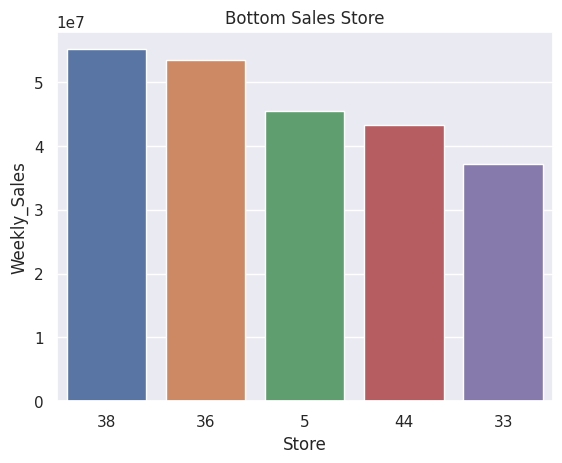

In [29]:
sns.barplot(x='Store', y='Weekly_Sales', data=bottom_sales_store, order=bottom_sales_store.Store)
plt.title('Bottom Sales Store')

<h3> How does holiday weekly sales compare to non-holiday weekly sales</h3>

In [30]:
non_holiday_sales = df[df['Holiday_Flag'] == 0]
holiday_sales = df[df['Holiday_Flag'] == 1]

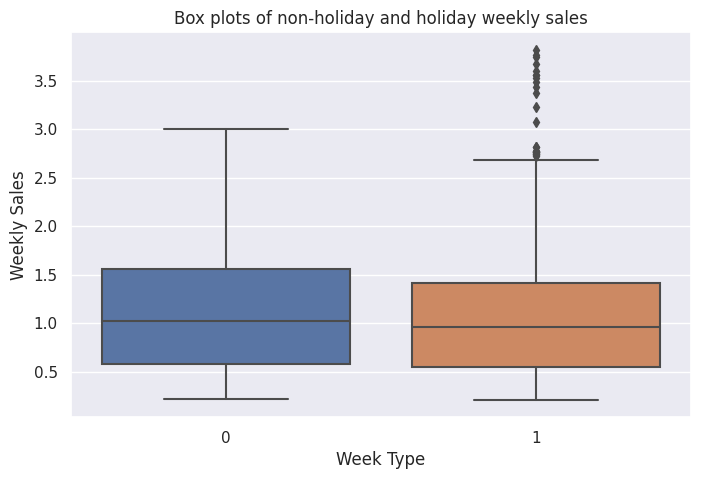

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6])

plt.xlabel('Week Type')
plt.ylabel('Weekly Sales')
plt.title('Box plots of non-holiday and holiday weekly sales')

plt.show()

They have similar spread. However, sales spike hard during holiday weeks. 

In [32]:
target = df['Weekly_Sales']
features = df.drop('Weekly_Sales', axis=1)

Find correlation between features and target (Weekly_Sales)

Text(0.5, 1.0, 'Correlation Heatmap')

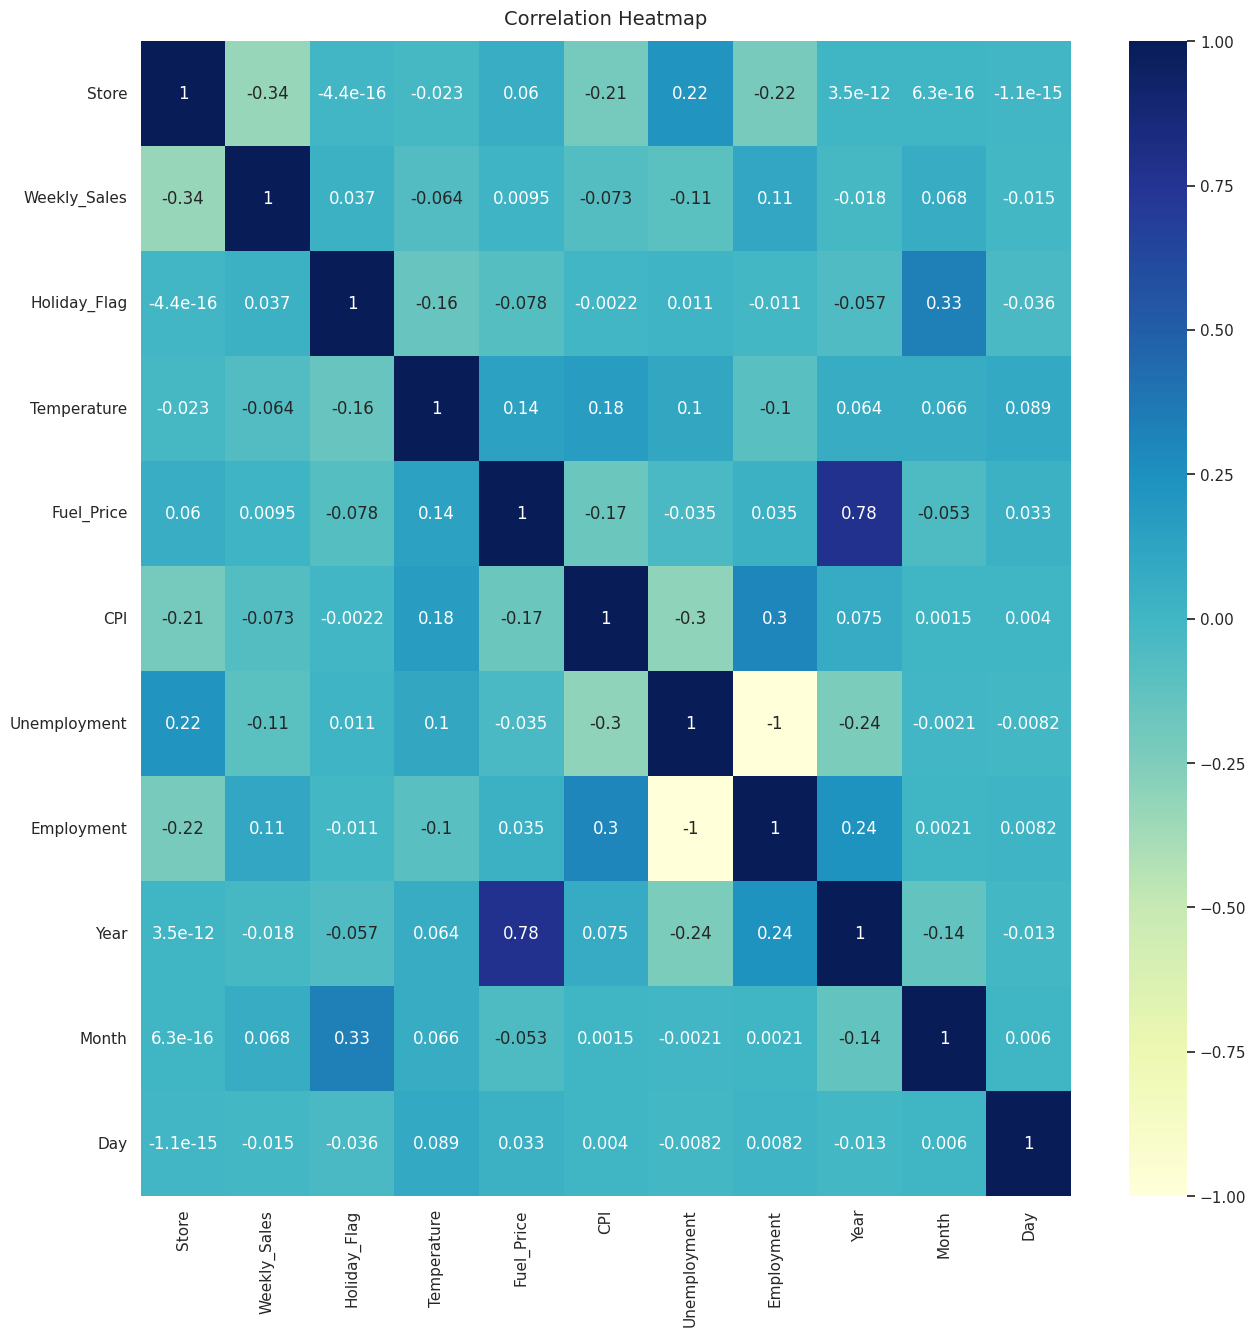

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1 ,annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Weekly_Sales has the strongest correlation with Employment (0.11 correlation coefficient).

#Model building

In [34]:
df_copy = df.copy()
df_copy.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


In [35]:
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
df_copy.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Employment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19


Seperate X and y

In [36]:
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

Scaling features

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split Train and Test data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
print(f'Train data: {X_train.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test data: {X_test.shape}')
print(f'Test target: {y_test.shape}')

Train data: (5148, 9)
Train target: (5148,)
Test data: (1287, 9)
Test target: (1287,)


Train Model

In [40]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  return round(rmse, 2)

In [41]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test, df):
  rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]

  coefs = []
  for regressor in regressors:
    if regressor not in [polynomial_regressor, decision_tree_regressor, random_forest_regressor]:
      coefs.append(regressor.coef_)
    else: coefs.append('No coef')

  median_sale = df['Weekly_Sales'].median()
  percent_deviation = [round((rmse*100/median_sale), 2) for rmse in rmses]

  regressor_rmses_coefs = dict(zip(regressor_names, zip(rmses, coefs, percent_deviation)))
  df = pd.DataFrame.from_dict(regressor_rmses_coefs, orient='index')
  df = df.reset_index()
  df.columns = ['regressor_name', 'rmse', 'coefficient', 'AVG % error']

  return df.sort_values('rmse', ignore_index=True)

In [42]:
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()

In [43]:
#collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor,
              lasso_regressor, decision_tree_regressor, random_forest_regressor]

#collect the name of regressors
regressor_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression',
                   'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression']

In [44]:
print('\033[1m Table of regressors with their RMSEs, coefficient and average error percentage')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test, df_copy)

 Table of regressors with their RMSEs, coefficient and average error percentage


,regressor_name,rmse,coefficient,AVG % error
0,Random Forest Regression,124774.62,No coef,12.99
1,Decision Tree Regression,147596.42,No coef,15.36
2,Polynomial Regression,473424.72,No coef,49.28
3,Linear Regression,522417.70,"[-730707596363.8513, -259392.64699727122, 4013...",54.38
4,Lasso Regression,522417.82,"[-195798.86345209985, 6393.238160978627, -2038...",54.38
5,Ridge Regression,522419.24,"[-195758.6270371625, 6395.080071495671, -20381...",54.38


Therefore, Random Forest Regression is the best model for predicting future sales, which achieved an RMSE of 123,559. This is a good estimate as it it 87% close to the median sale of the data.

In [45]:
from sklearn.metrics import r2_score
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)
r_square = r2_score(y_test, y_pred)
rm = np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
r_square, rm

(0.9269540334440586, 153401.73256544254)

In [47]:
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
r_square = r2_score(y_test, y_pred)
rm = np.sqrt(mean_squared_error(y_test, y_pred))

In [48]:
r_square, rm

(0.9508677948924961, 125810.03197640173)

# Try Cross-Validation

In [49]:
from sklearn.model_selection import cross_val_score
mse = [-cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error') for regressor in regressors]
mse

[array([2.62415492e+11, 2.62577507e+11, 2.87736425e+11, 2.70216107e+11,
        2.78545803e+11]),
 array([2.20834448e+11, 2.25260052e+11, 2.45034010e+11, 2.39725211e+11,
        2.36690983e+11]),
 array([2.62415692e+11, 2.62575930e+11, 2.87734277e+11, 2.70216226e+11,
        2.78547776e+11]),
 array([2.62415496e+11, 2.62577409e+11, 2.87736332e+11, 2.70216160e+11,
        2.78545910e+11]),
 array([3.29156761e+10, 2.94389413e+10, 2.95368658e+10, 3.04538159e+10,
        2.75434138e+10]),
 array([1.87435296e+10, 1.46197465e+10, 1.57487606e+10, 1.72159161e+10,
        1.39719153e+10])]

In [50]:
fold_mse = []
for ele in mse:
  lst = list(enumerate(ele))
  fold_mse.append(lst)
fold_mse

[[(0, 262415491800.784),
  (1, 262577506924.84805),
  (2, 287736424753.1853),
  (3, 270216107370.14752),
  (4, 278545802911.2858)],
 [(0, 220834447555.37125),
  (1, 225260052038.8913),
  (2, 245034009544.2717),
  (3, 239725211319.59604),
  (4, 236690983445.1309)],
 [(0, 262415691919.6963),
  (1, 262575929522.9036),
  (2, 287734276542.01697),
  (3, 270216225753.61288),
  (4, 278547775597.9019)],
 [(0, 262415495978.2263),
  (1, 262577409391.58493),
  (2, 287736331587.8541),
  (3, 270216160395.91278),
  (4, 278545910493.4882)],
 [(0, 32915676073.496944),
  (1, 29438941291.478706),
  (2, 29536865806.239532),
  (3, 30453815867.97837),
  (4, 27543413805.136024)],
 [(0, 18743529582.807697),
  (1, 14619746512.166317),
  (2, 15748760635.489332),
  (3, 17215916106.312523),
  (4, 13971915262.15728)]]

In [51]:
dict(list(enumerate(mse)))

{0: array([2.62415492e+11, 2.62577507e+11, 2.87736425e+11, 2.70216107e+11,
        2.78545803e+11]),
 1: array([2.20834448e+11, 2.25260052e+11, 2.45034010e+11, 2.39725211e+11,
        2.36690983e+11]),
 2: array([2.62415692e+11, 2.62575930e+11, 2.87734277e+11, 2.70216226e+11,
        2.78547776e+11]),
 3: array([2.62415496e+11, 2.62577409e+11, 2.87736332e+11, 2.70216160e+11,
        2.78545910e+11]),
 4: array([3.29156761e+10, 2.94389413e+10, 2.95368658e+10, 3.04538159e+10,
        2.75434138e+10]),
 5: array([1.87435296e+10, 1.46197465e+10, 1.57487606e+10, 1.72159161e+10,
        1.39719153e+10])}